In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('PaviaU_features.txt') 
label = pd.read_csv('PaviaU-label.txt') 

In [2]:
data.head()

,1467,1298,1298.1,1418,1408,1379,1350,1357,1424,1439,...,1388.1,1387,1377,1399,1400,1370,1344,1346,1327,1315
0,1203,1295,1302,1330,1391,1416,1390,1335,1271,1313,...,1111,1094,1084,1124,1144,1147,1165,1167,1144,1126
1,1341,1346,1272,1281,1168,1073,1127,1170,1187,1185,...,1146,1154,1158,1174,1162,1150,1140,1128,1123,1101
2,761,454,413,414,467,427,342,346,414,494,...,1725,1743,1694,1666,1690,1695,1685,1701,1734,1756
3,787,392,242,534,581,431,410,402,372,393,...,1440,1465,1453,1451,1505,1543,1516,1527,1548,1511
4,205,591,519,421,513,503,416,361,382,355,...,1847,1884,1863,1828,1819,1819,1818,1859,1957,2004


In [7]:
label['1'].unique()

array([1, 2, 3, 4, 9, 8, 5, 7, 6])

In [39]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.60)  

In [9]:
X_train.shape,X_test.shape

((34220, 103), (8555, 103))

In [4]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
 

In [40]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(120), max_iter=100,learning_rate_init=0.0036)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=120, learning_rate='constant',
       learning_rate_init=0.0036, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
predictions = mlp.predict(X_test) 
mlp.get_params(deep=False)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 120,
 'learning_rate': 'constant',
 'learning_rate_init': 0.0036,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [42]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import precision_recall_fscore_support as score
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[3192    9   23    0   18   10    4  655    0]
 [  46 9881   23  117    0 1129    0   24    0]
 [  31    5  238    0    0    5    0  996    0]
 [   0  133    0 1663    1   25    0    3    1]
 [  10    0    0    0  772    0    1    1    0]
 [  27  779    1    7    2 1929    0  306    0]
 [ 724    0    1    0    0    1    0   51    0]
 [  66   13   87    0    0   15    0 2060    0]
 [  61    2    0    0    0    6    0   12  499]]
              precision    recall  f1-score   support

           1       0.77      0.82      0.79      3911
           2       0.91      0.88      0.90     11220
           3       0.64      0.19      0.29      1275
           4       0.93      0.91      0.92      1826
           5       0.97      0.98      0.98       784
           6       0.62      0.63      0.63      3051
           7       0.00      0.00      0.00       777
           8       0.50      0.92      0.65      2241
           9       1.00      0.86      0.92       580

   micro avg       0.79  

if you do want to extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.
coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [43]:
precision,recall,fscore,support=score(y_test,predictions,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : 0.704537408979542
Recall    : 0.6878602787829584
F-score   : 0.6749429465771455
Support   : None


In [31]:
len(mlp.coefs_)

4

In [32]:
len(mlp.coefs_[0])

103

In [34]:
len(mlp.intercepts_)

4

In [35]:
len(mlp.intercepts_[0])

10

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support as score
f_score=0.001
hidden_layer_l=0
hidden_layer_w=0
learning_rate=0
lrr = np.arange(0.0001,0.01,0.0005)
for i in range(2,5):
    for j in range(10,200,20):
        for lr in lrr:
            hidden = np.full(i, j, dtype=int)
            mlp = MLPClassifier(hidden_layer_sizes=hidden, max_iter=100,learning_rate_init= lr)  
            mlp.fit(X_train, y_train.values.ravel())
            predictions = mlp.predict(X_test)
            precision,recall,fscore,support=score(y_test,predictions,average='macro')
            print('fscore : {} ,hidden_layer_l : {} ,hidden_layer_w : {} ,learning_rate : {}'.format(fscore,i,j,lr))
            if fscore>f_score:
                print('current fscore ---------- {}'.format(fscore))
                f_score = fscore
                hidden_layer_l=i
                hidden_layer_w=j
                learning_rate=lr

fscore : 0.7627890395745026 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0001
current fscore ---------- 0.7627890395745026
fscore : 0.9198061451154546 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0006000000000000001
current fscore ---------- 0.9198061451154546
fscore : 0.9323209339769374 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0011
current fscore ---------- 0.9323209339769374
fscore : 0.9325292346016649 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0016
current fscore ---------- 0.9325292346016649
fscore : 0.9371561457536876 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0021
current fscore ---------- 0.9371561457536876
fscore : 0.9349892645531036 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0026
fscore : 0.9283653731619689 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0031
fscore : 0.9230102471189805 ,hidden_layer_l : 2 ,hidden_layer_w : 10 ,learning_rate : 0.0036
fscore : 0.93394

fscore : 0.9473641876575384 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0011
fscore : 0.9411346090222441 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0016
fscore : 0.9527549124350815 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0021
fscore : 0.9545503791786698 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0026
fscore : 0.9495888415313076 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0031
fscore : 0.9443369830114625 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0036
fscore : 0.9523700866924842 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0041
fscore : 0.9423019545787292 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.004600000000000001
fscore : 0.9254629254430173 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0051
fscore : 0.9467040235186361 ,hidden_layer_l : 2 ,hidden_layer_w : 90 ,learning_rate : 0.0056
fscore : 0.9490931450003175 ,hidden_layer_l : 2 ,hidden_

fscore : 0.9350689276067486 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0036
fscore : 0.9427791542980057 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0041
fscore : 0.9446252021983739 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.004600000000000001
fscore : 0.948993959813063 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0051
fscore : 0.9411005632008218 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0056
fscore : 0.9478418647809226 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0061
fscore : 0.9425860067656847 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.006600000000000001
fscore : 0.9231229374795872 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0071
fscore : 0.9316837832525522 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0076
fscore : 0.9321617388580622 ,hidden_layer_l : 2 ,hidden_layer_w : 170 ,learning_rate : 0.0081
fscore : 0.9388685816335958 ,hidd

fscore : 0.9392570142707177 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.006600000000000001
fscore : 0.9254156581478709 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0071
fscore : 0.9435615158670705 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0076
fscore : 0.9281845737728242 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0081
fscore : 0.9419588308392454 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0086
fscore : 0.9453873588008904 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0091
fscore : 0.9278499677307158 ,hidden_layer_l : 3 ,hidden_layer_w : 50 ,learning_rate : 0.0096
fscore : 0.9367791712660656 ,hidden_layer_l : 3 ,hidden_layer_w : 70 ,learning_rate : 0.0001
fscore : 0.9495356248820942 ,hidden_layer_l : 3 ,hidden_layer_w : 70 ,learning_rate : 0.0006000000000000001
fscore : 0.9436818415390543 ,hidden_layer_l : 3 ,hidden_layer_w : 70 ,learning_rate : 0.0011
fscore : 0.9489713239668048 ,hidden_layer

fscore : 0.9264553040621775 ,hidden_layer_l : 3 ,hidden_layer_w : 130 ,learning_rate : 0.0096
fscore : 0.941283168729469 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0001
fscore : 0.9508186362054786 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0006000000000000001
fscore : 0.9459418263616668 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0011
fscore : 0.95242568264498 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0016
fscore : 0.9535516389738318 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0021
fscore : 0.9528905441015971 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0026
fscore : 0.9478115847868547 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0031
fscore : 0.941776869954355 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0036
fscore : 0.9340120941792058 ,hidden_layer_l : 3 ,hidden_layer_w : 150 ,learning_rate : 0.0041
fscore : 0.9314887300112397 ,hidden_layer_l : 3 ,

fscore : 0.9259617765577836 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0026
fscore : 0.9363410449757643 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0031
fscore : 0.9388308294986705 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0036
fscore : 0.9447061704422504 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0041
fscore : 0.9375244484203632 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.004600000000000001
fscore : 0.9471813819950494 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0051
fscore : 0.9472363715459553 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0056
fscore : 0.9426803041396342 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0061
fscore : 0.9495638078376258 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.006600000000000001
fscore : 0.9460153340116063 ,hidden_layer_l : 4 ,hidden_layer_w : 30 ,learning_rate : 0.0071
fscore : 0.9387735340985172 ,hidden_layer_

fscore : 0.9588747498434732 ,hidden_layer_l : 3 ,hidden_layer_w : 70 ,learning_rate : 0.0036

In [9]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

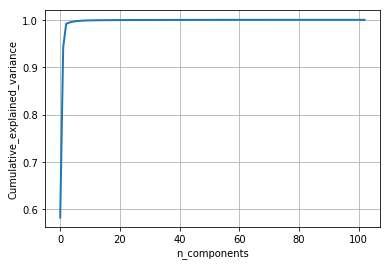

In [8]:
pca.n_components = 103
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [39]:
cum_var_explained[2]

0.9915829132438453

In [10]:
pca.n_components = 2
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42775, 2)


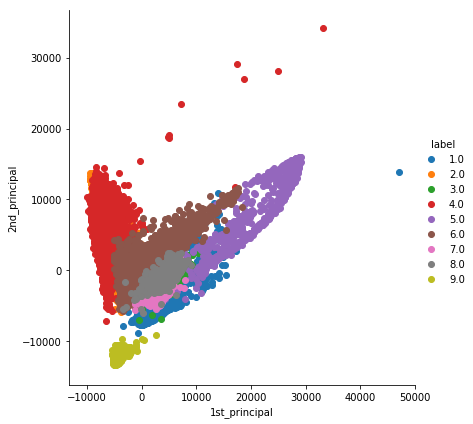

In [11]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label.T)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size = 0.20)  

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [14]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70), max_iter=100,learning_rate_init=0.0036)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 70, 70), learning_rate='constant',
       learning_rate_init=0.0036, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
predictions = mlp.predict(X_test) 
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predictions,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : 1.0
Recall    : 1.0
F-score   : 1.0
Support   : None


In [19]:
pca.n_components = 103
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, label.T)).T

X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size = 0.20) 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70), max_iter=100,learning_rate_init=0.0036)  
mlp.fit(X_train, y_train.values.ravel())  
predictions = mlp.predict(X_test) 
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predictions,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

shape of pca_reduced.shape =  (42775, 103)
Precision : 0.9965655801883025
Recall    : 0.9953468575678168
F-score   : 0.9959419719267361
Support   : None


In [22]:
pca.n_components = 20
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, label.T)).T


X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size = 0.60) 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70), max_iter=100,learning_rate_init=0.0036)  
mlp.fit(X_train, y_train.values.ravel())  
predictions = mlp.predict(X_test) 
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predictions,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

shape of pca_reduced.shape =  (42775, 20)
Precision : 0.9993484789096312
Recall    : 0.9993392514002488
F-score   : 0.9993437659008563
Support   : None


In [54]:
data = pd.read_csv('PaviaU_features.txt') 
label = pd.read_csv('PaviaU-label.txt') 
pca.n_components = 
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size = 0.60) 

mlp = MLPClassifier(hidden_layer_sizes=(120), max_iter=100,learning_rate_init=0.0036)  
mlp.fit(X_train, y_train.values.ravel())  
predictions = mlp.predict(X_test) 
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predictions,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

shape of pca_reduced.shape =  (42775, 20)
Precision : 0.9261151861076874
Recall    : 0.9299082852576027
F-score   : 0.9276901533098408
Support   : None


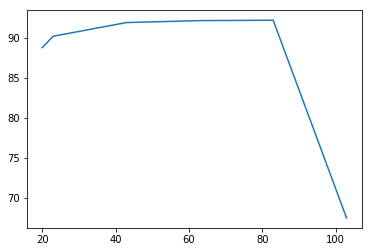

In [55]:
import seaborn as sns
ax = sns.lineplot(x=[20,23,43,63,83,103],y=[88.78951449702224,90.22352058421453,91.935806823051,92.17898550409518,92.22474644897408,67.49429465771455])